# AI Engineer 1 - Einführung Neuronale Netze
## Aufgabe: Implementierung eines Perzeptrons
Nutzen Sie den bereitgestellten (binären) Iris Datensatz und entwickeln Sie ein eigenes Perzeptron from Scratch.
Nutzen Sie das Notebook Repository als Hilfestellung, wenn Sie nicht weiterkommen.

### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from matplotlib import cm
from sklearn import metrics


### Load data

In [26]:
data = load_iris()
print(data)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Split data into x and y and test and train sets

In [27]:
# Select only 2 dimensions.
x = data["data"][:,:2]
# Binarize target.
y = np.where(data["target"]>=1,1,0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=45)


In [28]:
# Standardize input values (needs to be done separately for training and test data)
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

#print("x_train[0:10]", x_train[0:10])


### Perceptron architecture

In [39]:
class Perceptron:
    def __init__(self, x):
        """Initialize the hyperparameter."""
        self.w = np.random.uniform(-1, 1, size=(x.shape[1]))
        self.lr = 0.001

        self.error = []
        self.ws = []
        self.bs = []
        self.b = np.random.uniform(-1, 1, size=1)

    def loss(self, y, pred):
        """Loss function to evaluate model performance."""
        predOri = pred
        # First clip to also have log(0) defined.
        pred = np.clip(pred, 0.0001, 0.9999)
        loss = -np.mean(y * (np.log(pred)) + (1 - y) * np.log(1 - pred))
        print("---LOSS: y: ", y, "pred: ", pred)
        print("   pred: ", predOri, "predClipped: ", pred)
        print(
            "   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y: ",
            (y * (np.log(pred)) + (1 - y) * np.log(1 - pred)),
        )
        print("   loss: ", loss)
        return loss

    def accuracy(self, y, pred):
        """
        Difference between prediction and true y.
        Squared to eliminate negative numbers.
        Sum up to get total number of wrong predictions.
        Divide though total number of predictions to get error rate.
        Subtract from 1 to get the accuracy.
        """
        return 1 - np.sum((pred - y) ** 2) / y.shape[0]

    def predict(self, x):
        """
        Dot product between input x and weights w plus bias.
        If bigger 0, return class 1, otherwise return 0.
        """
        return np.where(np.dot(x, self.w) + self.b >= 0, 1, 0)

    def iteration(self, x, y):
        """
        Iteratively predicts every instance, computes error and updates
        weights and bias according to update rule.
        Also saves the the weights, bias and errors to visualize the
        progress of each iteration in the end.
        """
        errors = []
        # For every single instance and class pair.
        for xi, yi in zip(x, y):
            # Predict the class with current model.
            pred = self.predict(xi)
            # Compute and save loss (difference between real y and predicted y).
            errors.append(self.loss(yi, pred))
            # Adapt weights and bias according to update-rule.
            self.w = self.w + self.lr * (yi - pred) * xi
            self.b = self.b + self.lr * (yi - pred)

        # Save errors, weights and bias for later visualization.
        self.error.append(np.mean(errors))
        self.ws.append(self.w)
        self.bs.append(self.b)
        print("np.mean(errors):, w, b ", np.mean(errors), self.w, self.b)


### Train the model

In [40]:
# Initialize model.
model = Perceptron(x_train)

# Train the model with training data.
for _ in range(100):
    print("*** Next epoch ***")
    model.iteration(x_train, y_train)


*** Next epoch ***
---LOSS: y:  0 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-9.21034037]
   loss:  9.210340371976294
---LOSS: y:  1 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-0.00010001]
   loss:  0.00010000500033334732
---LOSS: y:  1 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-0.00010001]
   loss:  0.00010000500033334732
---LOSS: y:  0 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-9.21034037]
   loss:  9.210340371976294
---LOSS: y:  1 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-0.00010001]
   loss:  0.00010000500033334732
---LOSS: y:  0 pred:  [0.9999]
   pred:  [1] predClipped:  [0.9999]
   (y * (np.log(pred)) + (1 - y) * np.log(1 - pred))y:  [-9.21034037

### Evaluate the model

In [31]:
def evaluation_measures(y_test, y_pred):
    """
    Evaluate model predictions y_pred to the true labels y_test.

    Parameters
    ----------
    y_test : list or ndarray or pd.series.
        The data to process.
    y_pred : list or np.array or pd.series.
        The respective column's name.

    Returns
    -------
    cr : dict.
        classification report for the input.
    fpr, tpr, roc_auc : tuple(int, int, int).
        False-positive-rate, true-positive-rate and area-under-curve for input.
        Needed to plot ROC curve.
    cm : ndarray.
        Confusion matrix for input.
    """
    # Classification report.
    cr = metrics.classification_report(y_test, y_pred)

    # ROC curve.
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    # Confusion matrix.
    cm = metrics.confusion_matrix(y_test, y_pred)

    return cr, (fpr, tpr, roc_auc), cm

def plot_roc(auc_tuple):
    """
    Plots the ROC curve for input data.

    Parameters
    ----------
    auc_tuple : tuple(int, int, int).
        Includes fpr, tpr and auc (area-under-curve).
    """
    fpr, tpr, roc_auc = auc_tuple
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

def plot_cm(cm):
    """
    Plots the confusion matrix for input data.

    Parameters
    ----------
    cm : ndarray.
        Includes TN, FP, FN and TP.
    """
    tn, fp, fn, tp = cm.ravel()
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Reds")
    plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



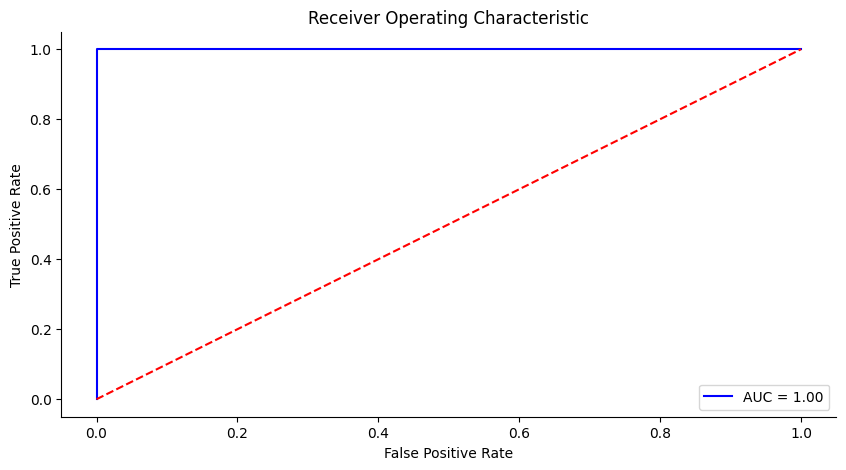

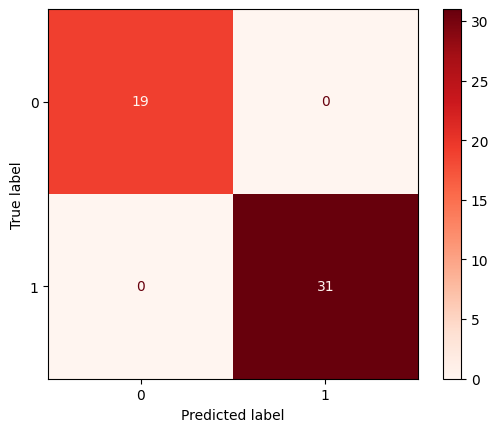

In [32]:
# Predict the testing set and copy true classes.
y_pred = model.predict(x_test)
y_true = np.copy(y_test)

# Test model accuracy with separate testing set (unseen data).
model.accuracy(y_test, y_pred)

# Evaluate model using preditions on the testing set.
cr, roc, cm = evaluation_measures(y_test, y_pred)
print(cr)
plot_roc(roc)
plot_cm(cm)


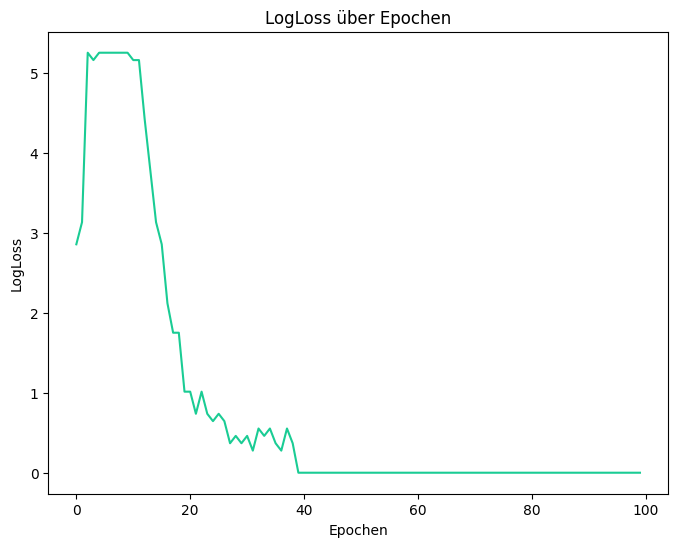

In [33]:
plt.figure(figsize=(8,6))
plt.plot(model.error,c="#1ACC94")
plt.title("LogLoss über Epochen")
plt.xlabel("Epochen")
plt.ylabel("LogLoss")
plt.show()


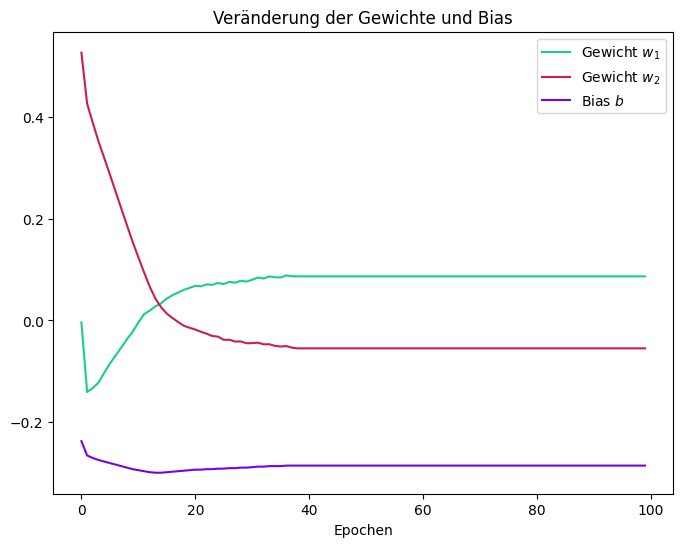

In [34]:
colors = ["#1ACC94","#CC1B58","#7902E5"]
plt.figure(figsize=(8,6))
for i, w in enumerate(np.array(model.ws).T):
    plt.plot(w,label="Gewicht $w_{}$".format(i+1),c=colors[i])
plt.plot(model.bs,label="Bias $b$",c=colors[-1])
plt.title("Veränderung der Gewichte und Bias")
plt.xlabel("Epochen")
plt.legend()
plt.show()


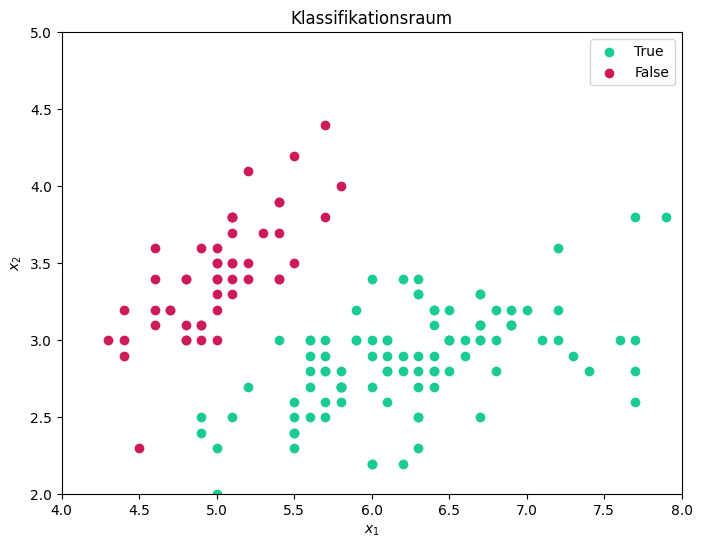

In [41]:
n = 500
z = []
meshgrid = np.meshgrid(np.linspace(4,8,n),np.linspace(2,5,n))
for value in np.nditer(meshgrid):
    z.append(model.predict(np.array(value)).item())

plt.figure(figsize=(8,6))
plt.scatter(x[np.where(y==1),:1],x[np.where(y==1),1:2],c="#1ACC94",label="True")
plt.scatter(x[np.where(y==0),:1],x[np.where(y==0),1:2],c="#CC1B58",label="False")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(4,8)
plt.ylim(2,5)
plt.legend()
plt.title("Klassifikationsraum")
plt.show()
